# Job recommendation system


# Import preliminary dependency


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import warnings; warnings.simplefilter('ignore')

# Load datasets

In [2]:
apps=pd.read_csv('apps.tsv', delimiter='\t',encoding='utf-8')

In [3]:
apps.head()

,UserID,WindowID,Split,ApplicationDate,JobID
0,47,1,Train,2012-04-04 15:56:23.537,169528
1,47,1,Train,2012-04-06 01:03:00.003,284009
2,47,1,Train,2012-04-05 02:40:27.753,2121
3,47,1,Train,2012-04-05 02:37:02.673,848187
4,47,1,Train,2012-04-05 22:44:06.653,733748


In [4]:
apps.columns

Index(['UserID', 'WindowID', 'Split', 'ApplicationDate', 'JobID'], dtype='object')

In [5]:
apps.shape

(1603111, 5)

In [6]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603111 entries, 0 to 1603110
Data columns (total 5 columns):
UserID             1603111 non-null int64
WindowID           1603111 non-null int64
Split              1603111 non-null object
ApplicationDate    1603111 non-null object
JobID              1603111 non-null int64
dtypes: int64(3), object(2)
memory usage: 61.2+ MB


In [7]:
user_history = pd.read_csv('user_history.tsv', delimiter='\t',encoding='utf-8')

In [8]:
user_history.head()

,UserID,WindowID,Split,Sequence,JobTitle
0,47,1,Train,1,National Space Communication Programs-Special ...
1,47,1,Train,2,Detention Officer
2,47,1,Train,3,"Passenger Screener, TSA"
3,72,1,Train,1,"Lecturer, Department of Anthropology"
4,72,1,Train,2,Student Assistant


In [9]:
user_history.columns

Index(['UserID', 'WindowID', 'Split', 'Sequence', 'JobTitle'], dtype='object')

In [10]:
user_history.shape

(1753901, 5)

In [11]:
user_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753901 entries, 0 to 1753900
Data columns (total 5 columns):
UserID      int64
WindowID    int64
Split       object
Sequence    int64
JobTitle    object
dtypes: int64(3), object(2)
memory usage: 66.9+ MB


In [12]:
jobs = pd.read_csv('jobs.tsv', delimiter='\t',encoding='utf-8', error_bad_lines=False)

b'Skipping line 122433: expected 11 fields, saw 12\n'
b'Skipping line 602576: expected 11 fields, saw 12\n'


In [13]:
jobs.head(3)

,JobID,WindowID,Title,Description,Requirements,City,State,Country,Zip5,StartDate,EndDate
0,1,1,Security Engineer/Technical Lead,<p>Security Clearance Required:&nbsp; Top Secr...,<p>SKILL SET</p>\r<p>&nbsp;</p>\r<p>Network Se...,Washington,DC,US,20531,2012-03-07 13:17:01.643,2012-04-06 23:59:59
1,4,1,SAP Business Analyst / WM,<strong>NO Corp. to Corp resumes&nbsp;are bein...,<p><b>WHAT YOU NEED: </b></p>\r<p>Four year co...,Charlotte,NC,US,28217,2012-03-21 02:03:44.137,2012-04-20 23:59:59
2,7,1,P/T HUMAN RESOURCES ASSISTANT,<b> <b> P/T HUMAN RESOURCES ASSISTANT</b> <...,Please refer to the Job Description to view th...,Winter Park,FL,US,32792,2012-03-02 16:36:55.447,2012-04-01 23:59:59


In [14]:
jobs.shape

(605854, 11)

In [15]:
jobs.columns

Index(['JobID', 'WindowID', 'Title', 'Description', 'Requirements', 'City',
       'State', 'Country', 'Zip5', 'StartDate', 'EndDate'],
      dtype='object')

In [16]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605854 entries, 0 to 605853
Data columns (total 11 columns):
JobID           605854 non-null int64
WindowID        605854 non-null int64
Title           605854 non-null object
Description     605850 non-null object
Requirements    564873 non-null object
City            605852 non-null object
State           605853 non-null object
Country         605850 non-null object
Zip5            388289 non-null object
StartDate       605853 non-null object
EndDate         605847 non-null object
dtypes: int64(2), object(9)
memory usage: 50.8+ MB


In [17]:
users = pd.read_csv('users.tsv' ,delimiter='\t',encoding='utf-8')

In [18]:
users.head(2)

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
0,47,1,Train,Paramount,CA,US,90723,High School,NaN,1999-06-01 00:00:00,3,10.0,Yes,No,0
1,72,1,Train,La Mesa,CA,US,91941,Master's,Anthropology,2011-01-01 00:00:00,10,8.0,Yes,No,0


In [19]:
users.columns

Index(['UserID', 'WindowID', 'Split', 'City', 'State', 'Country', 'ZipCode',
       'DegreeType', 'Major', 'GraduationDate', 'WorkHistoryCount',
       'TotalYearsExperience', 'CurrentlyEmployed', 'ManagedOthers',
       'ManagedHowMany'],
      dtype='object')

In [20]:
users.shape

(389708, 15)

In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389708 entries, 0 to 389707
Data columns (total 15 columns):
UserID                  389708 non-null int64
WindowID                389708 non-null int64
Split                   389708 non-null object
City                    389708 non-null object
State                   389218 non-null object
Country                 389708 non-null object
ZipCode                 387974 non-null object
DegreeType              389708 non-null object
Major                   292468 non-null object
GraduationDate          269477 non-null object
WorkHistoryCount        389708 non-null int64
TotalYearsExperience    375528 non-null float64
CurrentlyEmployed       347632 non-null object
ManagedOthers           389708 non-null object
ManagedHowMany          389708 non-null int64
dtypes: float64(1), int64(4), object(10)
memory usage: 44.6+ MB


# Exploratory Data Analysis (EDA) and Pre-processing

### Split training and testing data based on column split

In [22]:
apps_training = apps.loc[apps['Split'] == 'Train']

In [23]:
apps_training.head()

,UserID,WindowID,Split,ApplicationDate,JobID
0,47,1,Train,2012-04-04 15:56:23.537,169528
1,47,1,Train,2012-04-06 01:03:00.003,284009
2,47,1,Train,2012-04-05 02:40:27.753,2121
3,47,1,Train,2012-04-05 02:37:02.673,848187
4,47,1,Train,2012-04-05 22:44:06.653,733748


In [24]:
apps_training.shape

(1417514, 5)

In [25]:
apps_testing=apps.loc[apps['Split']=='Test']

In [26]:
apps_testing.head()

,UserID,WindowID,Split,ApplicationDate,JobID
126,767,1,Test,2012-04-01 14:37:20.023,85377
127,769,1,Test,2012-04-16 22:36:52.48,853328
128,769,1,Test,2012-04-09 18:59:28.193,86106
129,769,1,Test,2012-04-09 18:59:31.127,327571
130,769,1,Test,2012-04-08 21:29:11.993,119161


In [27]:
apps_testing.shape

(185597, 5)

In [28]:
user_history_training=user_history.loc[user_history['Split']=='Train']

In [29]:
user_history_training.head()

,UserID,WindowID,Split,Sequence,JobTitle
0,47,1,Train,1,National Space Communication Programs-Special ...
1,47,1,Train,2,Detention Officer
2,47,1,Train,3,"Passenger Screener, TSA"
3,72,1,Train,1,"Lecturer, Department of Anthropology"
4,72,1,Train,2,Student Assistant


In [30]:
user_history_training.shape

(1652513, 5)

In [31]:
user_history_testing=user_history.loc[user_history['Split']=='Test']

In [32]:
user_history_testing.shape

(101388, 5)

In [33]:
user_history_testing.head()

,UserID,WindowID,Split,Sequence,JobTitle
144,767,1,Test,1,Claims Adjuster
145,767,1,Test,2,Professional Baseball Player
146,767,1,Test,3,Professional Baseball Player
147,767,1,Test,4,Professional Baseball Player
148,767,1,Test,5,Professional Baseball Player


In [34]:
users_training=users.loc[users['Split']=='Train']

In [35]:
users_training.shape

(366870, 15)

In [36]:
users_training.head()

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
0,47,1,Train,Paramount,CA,US,90723,High School,NaN,1999-06-01 00:00:00,3,10.0,Yes,No,0
1,72,1,Train,La Mesa,CA,US,91941,Master's,Anthropology,2011-01-01 00:00:00,10,8.0,Yes,No,0
2,80,1,Train,Williamstown,NJ,US,08094,High School,Not Applicable,1985-06-01 00:00:00,5,11.0,Yes,Yes,5
3,98,1,Train,Astoria,NY,US,11105,Master's,Journalism,2007-05-01 00:00:00,3,3.0,Yes,No,0
4,123,1,Train,Baton Rouge,LA,US,70808,Bachelor's,Agricultural Business,2011-05-01 00:00:00,1,9.0,Yes,No,0


In [37]:
users_testing=users.loc[users['Split']=='Test']

In [38]:
users_testing.shape

(22838, 15)

In [39]:
users_testing.head()

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
31,767,1,Test,Murrieta,CA,US,92562,Bachelor's,University Studies/Business,2008-05-01 00:00:00,5,16.0,No,No,0
32,769,1,Test,Roselle,IL,US,60172,Bachelor's,Radio-Television,2011-05-01 00:00:00,5,5.0,Yes,No,0
33,861,1,Test,Morris,IL,US,60450,High School,General Studies,1989-05-01 00:00:00,7,21.0,NaN,No,0
38,1006,1,Test,West Chester,PA,US,19382,High School,Not Applicable,2008-06-01 00:00:00,3,6.0,Yes,No,0
44,1192,1,Test,Cincinnati,OH,US,45255,Bachelor's,Marketing,NaN,5,6.0,Yes,No,0


# List of all Training data Record

In [40]:
apps_training.head()

,UserID,WindowID,Split,ApplicationDate,JobID
0,47,1,Train,2012-04-04 15:56:23.537,169528
1,47,1,Train,2012-04-06 01:03:00.003,284009
2,47,1,Train,2012-04-05 02:40:27.753,2121
3,47,1,Train,2012-04-05 02:37:02.673,848187
4,47,1,Train,2012-04-05 22:44:06.653,733748


In [41]:
user_history_training.head()

,UserID,WindowID,Split,Sequence,JobTitle
0,47,1,Train,1,National Space Communication Programs-Special ...
1,47,1,Train,2,Detention Officer
2,47,1,Train,3,"Passenger Screener, TSA"
3,72,1,Train,1,"Lecturer, Department of Anthropology"
4,72,1,Train,2,Student Assistant


In [42]:
users_training.head()

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
0,47,1,Train,Paramount,CA,US,90723,High School,NaN,1999-06-01 00:00:00,3,10.0,Yes,No,0
1,72,1,Train,La Mesa,CA,US,91941,Master's,Anthropology,2011-01-01 00:00:00,10,8.0,Yes,No,0
2,80,1,Train,Williamstown,NJ,US,08094,High School,Not Applicable,1985-06-01 00:00:00,5,11.0,Yes,Yes,5
3,98,1,Train,Astoria,NY,US,11105,Master's,Journalism,2007-05-01 00:00:00,3,3.0,Yes,No,0
4,123,1,Train,Baton Rouge,LA,US,70808,Bachelor's,Agricultural Business,2011-05-01 00:00:00,1,9.0,Yes,No,0


# List of all Testing data Record

In [43]:
apps_testing.head()

,UserID,WindowID,Split,ApplicationDate,JobID
126,767,1,Test,2012-04-01 14:37:20.023,85377
127,769,1,Test,2012-04-16 22:36:52.48,853328
128,769,1,Test,2012-04-09 18:59:28.193,86106
129,769,1,Test,2012-04-09 18:59:31.127,327571
130,769,1,Test,2012-04-08 21:29:11.993,119161


In [44]:
user_history_testing.head()

,UserID,WindowID,Split,Sequence,JobTitle
144,767,1,Test,1,Claims Adjuster
145,767,1,Test,2,Professional Baseball Player
146,767,1,Test,3,Professional Baseball Player
147,767,1,Test,4,Professional Baseball Player
148,767,1,Test,5,Professional Baseball Player


In [45]:
users_testing.head()

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
31,767,1,Test,Murrieta,CA,US,92562,Bachelor's,University Studies/Business,2008-05-01 00:00:00,5,16.0,No,No,0
32,769,1,Test,Roselle,IL,US,60172,Bachelor's,Radio-Television,2011-05-01 00:00:00,5,5.0,Yes,No,0
33,861,1,Test,Morris,IL,US,60450,High School,General Studies,1989-05-01 00:00:00,7,21.0,NaN,No,0
38,1006,1,Test,West Chester,PA,US,19382,High School,Not Applicable,2008-06-01 00:00:00,3,6.0,Yes,No,0
44,1192,1,Test,Cincinnati,OH,US,45255,Bachelor's,Marketing,NaN,5,6.0,Yes,No,0


## Exploratory Data Analysis (EDA) for job openings based on their location information

In [46]:
#group by city ,state,country wise
jobs.groupby(['City','State','Country']).size().reset_index(name='Locationwise').head()

,City,State,Country,Locationwise
0,- Any,,CZ,2
1,29 Palms,CA,US,1
2,APAC-Australia,,AU,41
3,Aaron,IN,US,5
4,Abbeville,LA,US,22


In [47]:
# in state some null(empty) value are present
jobs.groupby(['City','State','Country']).size().reset_index(name='Locationwise').shape

(13243, 4)

In [48]:
# group by country wise
jobs.groupby(['Country']).size().reset_index(name='Locationwise').head()

,Country,Locationwise
0,32905,1
1,97838,2
2,AF,291
3,AT,41
4,AU,50


In [49]:
jobs.groupby(['Country']).size().reset_index(name='Locationwise').sort_values('Locationwise', ascending=False).head()

,Country,Locationwise
42,US,605212
2,AF,291
4,AU,50
28,MX,49
3,AT,41


In [50]:
Country_wise_job=jobs.groupby(['Country']).size().reset_index(name='Locationwise').sort_values('Locationwise', ascending=False)

### plot figure of  country_wise_job

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

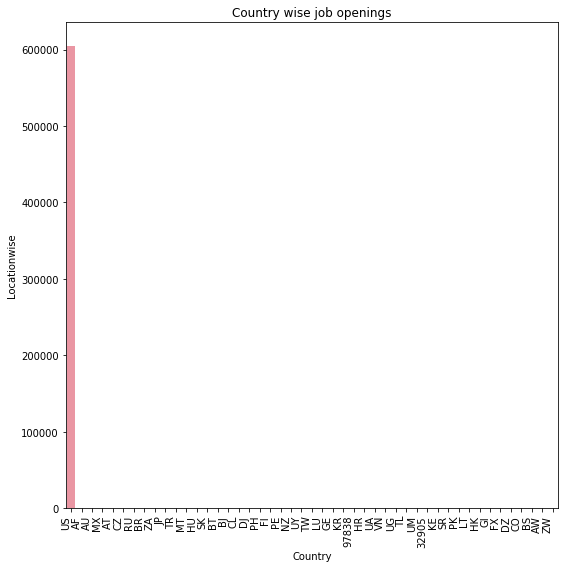

In [52]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x="Country", y="Locationwise", data=Country_wise_job)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,ha="right")
ax.set_title('Country wise job openings')
plt.tight_layout()
plt.show()

# pre-processing

### Now we will perform following pre-processing steps:
    We will consider only US region for building this recommendation engine
    We will be removing data records where state is blank or state data attribute is having numerical value.(If needed)
    
    

In [53]:
#only us region is important of job recommendation other country are blank.
#we select the us region for recommendation

In [54]:
#we use loc because we select column
jobs_US=jobs.loc[jobs['Country']=='US']

In [55]:
jobs_US[['City','State','Country']].head()

,City,State,Country
0,Washington,DC,US
1,Charlotte,NC,US
2,Winter Park,FL,US
3,Orlando,FL,US
4,Orlando,FL,US


In [56]:
#sort us data according to city,state
jobs_US.groupby(['City','State','Country']).size().reset_index(name='Locationwise').sort_values('Locationwise', ascending=False).head()

,City,State,Country,Locationwise
5562,Houston,TX,US,10454
8307,New York,NY,US,10220
2234,Chicago,IL,US,9906
2936,Dallas,TX,US,7275
516,Atlanta,GA,US,6833


In [57]:
#we select the job according to state wise in us
State_wise_job_US = jobs_US.groupby(['State']).size().reset_index(name='Locationwise').sort_values('Locationwise',ascending=False)

In [58]:
State_wise_job_US.head()

,State,Locationwise
5,CA,60675
47,TX,53866
10,FL,39355
16,IL,32576
37,NY,30515


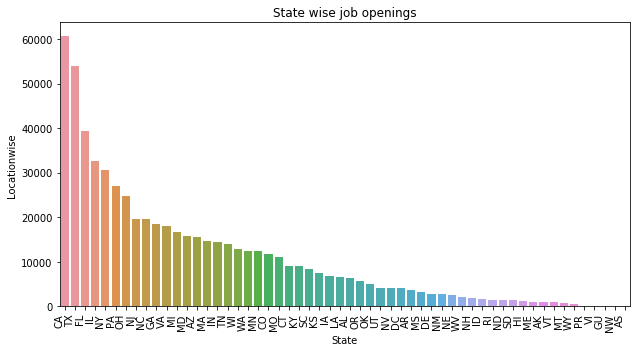

In [59]:
plt.figure(figsize=(9,5))
ax = sns.barplot(x="State", y="Locationwise",data=State_wise_job_US)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('State wise job openings')
plt.tight_layout()
plt.show()

In [60]:

jobs_US.groupby(['City']).size().reset_index(name='Locationwise').sort_values('Locationwise',ascending=False).head()

,City,Locationwise
3921,Houston,10463
5837,New York,10223
1536,Chicago,9906
2024,Dallas,7310
350,Atlanta,6840


In [61]:
City_wise_location = jobs_US.groupby(['City']).size().reset_index( name='Locationwise').sort_values('Locationwise',ascending=False)

In [62]:
City_wise_location.head()

,City,Locationwise
3921,Houston,10463
5837,New York,10223
1536,Chicago,9906
2024,Dallas,7310
350,Atlanta,6840


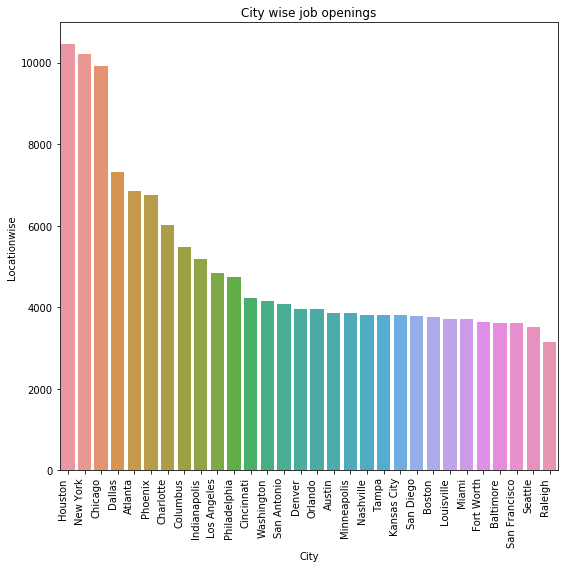

In [63]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x="City", y="Locationwise",data=City_wise_location.head(30))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('City wise job openings')
plt.tight_layout()
plt.show()

### Insights:

We have analyze the demand (job openings). Now there is time to analyze the supply(user-profiles)

## Exploratory Data Analysis(EDA)  for User profiles based on their location information

In [64]:
user_training_c=users_training.groupby(['Country']).size().reset_index(name='Locationwise').sort_values('Locationwise', ascending=False).head()
user_training_c

,Country,Locationwise
105,US,365740
47,IN,236
18,CA,108
81,PH,59
82,PK,59


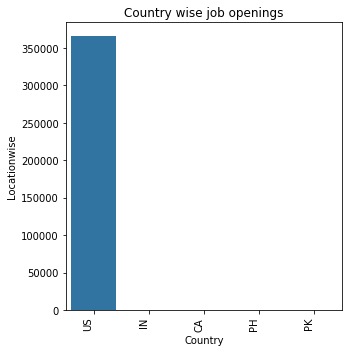

In [65]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x="Country", y="Locationwise", data=user_training_c)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,ha="right")
ax.set_title('Country wise job openings')
plt.tight_layout()
plt.show()

In [66]:
#upper table us data is more thats why we choose country us
user_training_US = users_training.loc[users_training['Country']=='US']


In [67]:
user_training_US.head()


,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
0,47,1,Train,Paramount,CA,US,90723,High School,NaN,1999-06-01 00:00:00,3,10.0,Yes,No,0
1,72,1,Train,La Mesa,CA,US,91941,Master's,Anthropology,2011-01-01 00:00:00,10,8.0,Yes,No,0
2,80,1,Train,Williamstown,NJ,US,08094,High School,Not Applicable,1985-06-01 00:00:00,5,11.0,Yes,Yes,5
3,98,1,Train,Astoria,NY,US,11105,Master's,Journalism,2007-05-01 00:00:00,3,3.0,Yes,No,0
4,123,1,Train,Baton Rouge,LA,US,70808,Bachelor's,Agricultural Business,2011-05-01 00:00:00,1,9.0,Yes,No,0


In [68]:
user_training_US.shape

(365740, 15)

In [69]:
user_training_US.groupby(['State']).size().reset_index(name='Locationwise_state').sort_values('Locationwise_state',ascending=False).head()

,State,Locationwise_state
11,FL,40381
47,TX,33260
6,CA,31141
17,IL,22557
37,NY,19299


In [70]:
user_training_US_state_wise = user_training_US.groupby(['State']).size().reset_index( name='Locationwise_state').sort_values('Locationwise_state',ascending=False)

In [71]:
#user_training_US_th = user_training_US_state_wise.loc[user_training_US_state_wise['Locationwise_state']>=12]

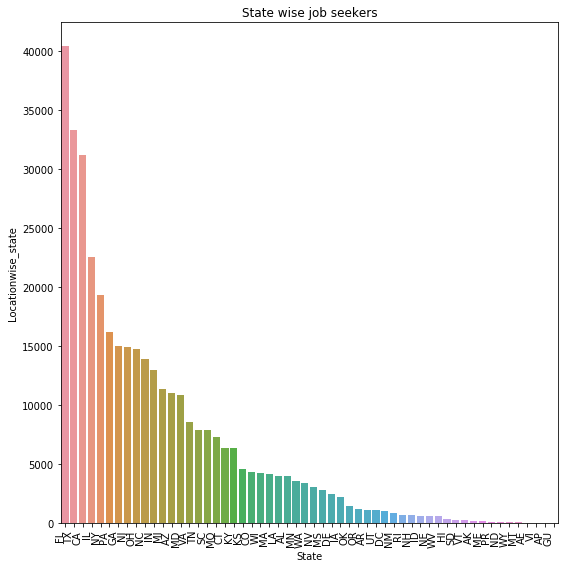

In [72]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x="State", y="Locationwise_state",data=user_training_US_state_wise)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('State wise job seekers')
plt.tight_layout()
plt.show()

In [73]:
user_training_US.groupby(['City']).size().reset_index(name='Locationwise_city').sort_values('Locationwise_city',ascending=False).head()

,City,Locationwise_city
1528,Chicago,6964
4066,Houston,5487
4177,Indianapolis,4450
5604,Miami,4359
6965,Philadelphia,4347


In [74]:
user_training_US_city_wise = user_training_US.groupby(['City']).size().reset_index(name='Locationwise_city').sort_values('Locationwise_city',ascending=False)

In [75]:
#user_training_US_City_th = user_training_US_city_wise.loc[user_training_US_city_wise['Locationwise_city']>=12]
user_training_US_city_wise.head()

,City,Locationwise_city
1528,Chicago,6964
4066,Houston,5487
4177,Indianapolis,4450
5604,Miami,4359
6965,Philadelphia,4347


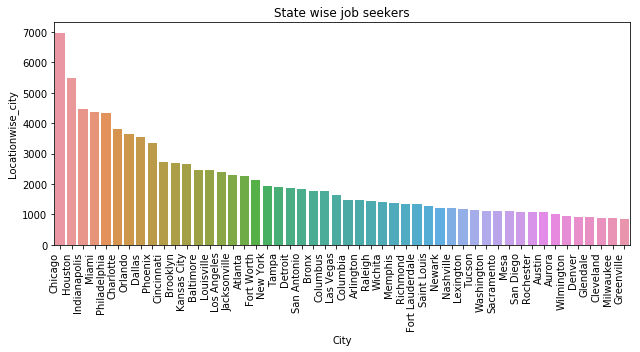

In [76]:
plt.figure(figsize=(9,5))
ax = sns.barplot(x="City", y="Locationwise_city",data=user_training_US_city_wise.head(50))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('State wise job seekers')
plt.tight_layout()
plt.show()

# content based job

### Let's find out Similar jobs


In [77]:
#we find  jobs on  jobs_US data

In [78]:
jobs_US.head()

,JobID,WindowID,Title,Description,Requirements,City,State,Country,Zip5,StartDate,EndDate
0,1,1,Security Engineer/Technical Lead,<p>Security Clearance Required:&nbsp; Top Secr...,<p>SKILL SET</p>\r<p>&nbsp;</p>\r<p>Network Se...,Washington,DC,US,20531,2012-03-07 13:17:01.643,2012-04-06 23:59:59
1,4,1,SAP Business Analyst / WM,<strong>NO Corp. to Corp resumes&nbsp;are bein...,<p><b>WHAT YOU NEED: </b></p>\r<p>Four year co...,Charlotte,NC,US,28217,2012-03-21 02:03:44.137,2012-04-20 23:59:59
2,7,1,P/T HUMAN RESOURCES ASSISTANT,<b> <b> P/T HUMAN RESOURCES ASSISTANT</b> <...,Please refer to the Job Description to view th...,Winter Park,FL,US,32792,2012-03-02 16:36:55.447,2012-04-01 23:59:59
3,8,1,Route Delivery Drivers,CITY BEVERAGES Come to work for the best in th...,Please refer to the Job Description to view th...,Orlando,FL,US,NaN,2012-03-03 09:01:10.077,2012-04-02 23:59:59
4,9,1,Housekeeping,I make sure every part of their day is magica...,Please refer to the Job Description to view th...,Orlando,FL,US,NaN,2012-03-03 09:01:11.88,2012-04-02 23:59:59


In [79]:
jobs_US.columns

Index(['JobID', 'WindowID', 'Title', 'Description', 'Requirements', 'City',
       'State', 'Country', 'Zip5', 'StartDate', 'EndDate'],
      dtype='object')

In [80]:
jobs_US.shape

(605212, 11)

In [81]:
#jobs_US.head().transpose()

In [82]:
jobs_US_base_line = jobs_US.iloc[0:10000,0:8]

In [83]:

jobs_US_base_line['Title'].isnull().head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Title, dtype: bool

In [84]:
jobs_US_base_line.head()


,JobID,WindowID,Title,Description,Requirements,City,State,Country
0,1,1,Security Engineer/Technical Lead,<p>Security Clearance Required:&nbsp; Top Secr...,<p>SKILL SET</p>\r<p>&nbsp;</p>\r<p>Network Se...,Washington,DC,US
1,4,1,SAP Business Analyst / WM,<strong>NO Corp. to Corp resumes&nbsp;are bein...,<p><b>WHAT YOU NEED: </b></p>\r<p>Four year co...,Charlotte,NC,US
2,7,1,P/T HUMAN RESOURCES ASSISTANT,<b> <b> P/T HUMAN RESOURCES ASSISTANT</b> <...,Please refer to the Job Description to view th...,Winter Park,FL,US
3,8,1,Route Delivery Drivers,CITY BEVERAGES Come to work for the best in th...,Please refer to the Job Description to view th...,Orlando,FL,US
4,9,1,Housekeeping,I make sure every part of their day is magica...,Please refer to the Job Description to view th...,Orlando,FL,US


In [85]:
jobs_US_base_line['Title'] = jobs_US_base_line['Title'].fillna('')
jobs_US_base_line.head()

,JobID,WindowID,Title,Description,Requirements,City,State,Country
0,1,1,Security Engineer/Technical Lead,<p>Security Clearance Required:&nbsp; Top Secr...,<p>SKILL SET</p>\r<p>&nbsp;</p>\r<p>Network Se...,Washington,DC,US
1,4,1,SAP Business Analyst / WM,<strong>NO Corp. to Corp resumes&nbsp;are bein...,<p><b>WHAT YOU NEED: </b></p>\r<p>Four year co...,Charlotte,NC,US
2,7,1,P/T HUMAN RESOURCES ASSISTANT,<b> <b> P/T HUMAN RESOURCES ASSISTANT</b> <...,Please refer to the Job Description to view th...,Winter Park,FL,US
3,8,1,Route Delivery Drivers,CITY BEVERAGES Come to work for the best in th...,Please refer to the Job Description to view th...,Orlando,FL,US
4,9,1,Housekeeping,I make sure every part of their day is magica...,Please refer to the Job Description to view th...,Orlando,FL,US


In [86]:
jobs_US_base_line['Description'].isnull().head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Description, dtype: bool

In [87]:
jobs_US_base_line['Description'] = jobs_US_base_line['Description'].fillna('')

In [88]:
jobs_US_base_line['Requirements'].isnull().head()


0    False
1    False
2    False
3    False
4    False
Name: Requirements, dtype: bool

In [89]:
jobs_US_base_line['Requirements'] = jobs_US_base_line['Requirements'].fillna('')


In [90]:
#merge description column and title column in description
jobs_US_base_line['Description'] = jobs_US_base_line['Title'] + jobs_US_base_line['Description']
desc=jobs_US_base_line['Description']
desc.head()


0    Security Engineer/Technical Lead<p>Security Cl...
1    SAP Business Analyst / WM<strong>NO Corp. to C...
2    P/T HUMAN RESOURCES ASSISTANT<b>    <b> P/T HU...
3    Route Delivery DriversCITY BEVERAGES Come to w...
4    HousekeepingI make  sure every part of their d...
Name: Description, dtype: object

In [91]:
jobs_US_base_line.head()

,JobID,WindowID,Title,Description,Requirements,City,State,Country
0,1,1,Security Engineer/Technical Lead,Security Engineer/Technical Lead<p>Security Cl...,<p>SKILL SET</p>\r<p>&nbsp;</p>\r<p>Network Se...,Washington,DC,US
1,4,1,SAP Business Analyst / WM,SAP Business Analyst / WM<strong>NO Corp. to C...,<p><b>WHAT YOU NEED: </b></p>\r<p>Four year co...,Charlotte,NC,US
2,7,1,P/T HUMAN RESOURCES ASSISTANT,P/T HUMAN RESOURCES ASSISTANT<b> <b> P/T HU...,Please refer to the Job Description to view th...,Winter Park,FL,US
3,8,1,Route Delivery Drivers,Route Delivery DriversCITY BEVERAGES Come to w...,Please refer to the Job Description to view th...,Orlando,FL,US
4,9,1,Housekeeping,HousekeepingI make sure every part of their d...,Please refer to the Job Description to view th...,Orlando,FL,US


In [92]:
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
Cv=CountVectorizer()

In [94]:
CV_matrix=Cv.fit_transform(jobs_US_base_line['Description'])
CV_matrix.shape

(10000, 39873)

In [95]:
from sklearn.feature_extraction.text import TfidfTransformer

In [96]:
tfidf_transfer=TfidfTransformer()

In [97]:
tfidf_matrix=tfidf_transfer.fit_transform(CV_matrix)

In [98]:
tfidf_matrix.shape

(10000, 39873)

In [99]:
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [100]:
# http://scikit-learn.org/stable/modules/metrics.html#linear-kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [101]:
cosine_sim[1]

array([0.12193633, 1.        , 0.03680659, ..., 0.14937868, 0.14937868,
       0.14937868])

In [102]:
#reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill=”)
jobs_US_base_line = jobs_US_base_line.reset_index(col_level=0)
jobs_US_base_line 

,index,JobID,WindowID,Title,Description,Requirements,City,State,Country
0,0,1,1,Security Engineer/Technical Lead,Security Engineer/Technical Lead<p>Security Cl...,<p>SKILL SET</p>\r<p>&nbsp;</p>\r<p>Network Se...,Washington,DC,US
1,1,4,1,SAP Business Analyst / WM,SAP Business Analyst / WM<strong>NO Corp. to C...,<p><b>WHAT YOU NEED: </b></p>\r<p>Four year co...,Charlotte,NC,US
2,2,7,1,P/T HUMAN RESOURCES ASSISTANT,P/T HUMAN RESOURCES ASSISTANT<b> <b> P/T HU...,Please refer to the Job Description to view th...,Winter Park,FL,US
3,3,8,1,Route Delivery Drivers,Route Delivery DriversCITY BEVERAGES Come to w...,Please refer to the Job Description to view th...,Orlando,FL,US
4,4,9,1,Housekeeping,HousekeepingI make sure every part of their d...,Please refer to the Job Description to view th...,Orlando,FL,US
5,5,10,1,SALON/SPA COORDINATOR,SALON/SPA COORDINATOR<b> <b>— SALON/SPA COO...,Please refer to the Job Description to view th...,Ormond Beach,FL,US
6,6,11,1,SUPERINTENDENT,SUPERINTENDENT<b> <b>SUPERINTENDENT</b> </b...,Please refer to the Job Description to view th...,Orlando,FL,US
7,7,12,1,ELECTRONIC PRE-PRESS PROFESSIONAL,ELECTRONIC PRE-PRESS PROFESSIONAL<b> <b>ELE...,Please refer to the Job Description to view th...,Orlando,FL,US
8,8,13,1,UTILITY LINE TRUCK OPERATOR/ DIGGER DERRICK,UTILITY LINE TRUCK OPERATOR/ DIGGER DERRICK<b>...,Please refer to the Job Description to view th...,Orlando,FL,US
9,9,14,1,CONSTRUCTION PROJECT MGR & PM TRAINEE,CONSTRUCTION PROJECT MGR & PM TRAINEE<b> <b...,Please refer to the Job Description to view th...,Winter Park,FL,US


In [103]:
titles = jobs_US_base_line['Title']
titles.head()
titles.unique().shape

(7508,)

In [104]:
# series work is the axis labels are collectively referred to as the index. 
indices = pd.Series(jobs_US_base_line.index, index=jobs_US_base_line['Title'])
indices.shape

(10000,)

In [105]:
indices.head(10)
idx = indices['Security Engineer/Technical Lead']
idx

0

In [106]:
titles.shape

(10000,)

### Recommendation Algorithms

In [107]:
#This enumerate object can then be used directly in for loops or be converted into a list of tuples using list() method
def job_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    job_indices = [i[0] for i in sim_scores]
    return titles.iloc[job_indices]

In [108]:
job_recommendations('SAP Business Analyst / WM').head(10)

1                           SAP Business Analyst / WM
6051                    SAP FI/CO Business Consultant
5868                       SAP FI/CO Business Analyst
5159                          SAP Basis Administrator
5351    SAP Sales and Distribution Solution Architect
4796       Senior Specialist - SAP Configuration - SD
5117                       SAP Integration Specialist
4728           SAP ABAP Developer with PRA experience
5244                                 Business Analyst
6277                              SAP Project Manager
Name: Title, dtype: object

In [ ]:
job_recommendations('Security Engineer/Technical Lead').head(10)

In [ ]:
job_recommendations('Immediate Opening').head(10)

In [ ]:
 job_recommendations('EXPERIENCED ROOFERS').head()

In [109]:
from sklearn.feature_extraction.text import CountVectorizer


In [110]:
cv=CountVectorizer()

In [111]:
cv_matrix = cv.fit_transform(jobs_US_base_line['Description'])

In [112]:
cv_matrix.shape

(10000, 39873)

In [113]:
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [114]:
cosine_sim2 = linear_kernel(cv_matrix, cv_matrix)

### Recommendation Algorithms

In [115]:
def job_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim2[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    job_indices = [i[0] for i in sim_scores]
    return titles.iloc[job_indices]

In [116]:
job_recommendations('SAP Business Analyst / WM').head(10)

3108    Instructional Laboratory Technician - Writing ...
592                                       Chief of Police
6293              3 Network Architects needed - immediate
6915                         Property Management Director
6190    Marketing and Sponsorship Director, Premier an...
3335                 ELECTRICAL ESTIMATION FOR THE A TEAM
7643         Companions, Certified Home Health Aides & RN
3336              ELECTRICAL CONSTRUCTION PROJECT MANAGER
3337    ELECTRICAL LEAD ESTIMATOR, TIMBERLINE NETWORK ...
619     Sr Director of Business Development, HID Conne...
Name: Title, dtype: object

In [118]:
job_recommendations('Property Management Director').head(10)

1680                             Director of Nursing
7643    Companions, Certified Home Health Aides & RN
7653                                       REGISTRAR
6915                    Property Management Director
1284                       Special Education Teacher
3664                    Corporate Quality Technician
6293         3 Network Architects needed - immediate
6917                                Property Manager
2881                                   HR Generalist
7412                       Assistant Project Manager
Name: Title, dtype: object

# colabrative  filtering based job

##### Find out similar users -- Find out for which jobs they have applied -- suggest those job to the other users who shared similar user profile.


In [119]:
users_training.head()

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
0,47,1,Train,Paramount,CA,US,90723,High School,NaN,1999-06-01 00:00:00,3,10.0,Yes,No,0
1,72,1,Train,La Mesa,CA,US,91941,Master's,Anthropology,2011-01-01 00:00:00,10,8.0,Yes,No,0
2,80,1,Train,Williamstown,NJ,US,08094,High School,Not Applicable,1985-06-01 00:00:00,5,11.0,Yes,Yes,5
3,98,1,Train,Astoria,NY,US,11105,Master's,Journalism,2007-05-01 00:00:00,3,3.0,Yes,No,0
4,123,1,Train,Baton Rouge,LA,US,70808,Bachelor's,Agricultural Business,2011-05-01 00:00:00,1,9.0,Yes,No,0


In [120]:
users_testing.head()

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
31,767,1,Test,Murrieta,CA,US,92562,Bachelor's,University Studies/Business,2008-05-01 00:00:00,5,16.0,No,No,0
32,769,1,Test,Roselle,IL,US,60172,Bachelor's,Radio-Television,2011-05-01 00:00:00,5,5.0,Yes,No,0
33,861,1,Test,Morris,IL,US,60450,High School,General Studies,1989-05-01 00:00:00,7,21.0,NaN,No,0
38,1006,1,Test,West Chester,PA,US,19382,High School,Not Applicable,2008-06-01 00:00:00,3,6.0,Yes,No,0
44,1192,1,Test,Cincinnati,OH,US,45255,Bachelor's,Marketing,NaN,5,6.0,Yes,No,0


In [121]:
user_based_approach_US = users_training.loc[users_training['Country']=='US']

In [122]:
user_based_approach_US_test = users_testing.loc[users_testing['Country']=='US']

In [123]:
user_based_approach = user_based_approach_US.iloc[0:10000,:]

In [124]:
user_based_approach_test = user_based_approach_US_test.iloc[0:10000,:]

In [125]:
#user_based_approach.head()

In [126]:
user_based_approach['DegreeType'].shape

(10000,)

In [127]:
user_based_approach['DegreeType'].isnull().shape

(10000,)

In [128]:
user_based_approach['DegreeType'] = user_based_approach['DegreeType'].fillna('')
user_based_approach_test['DegreeType']=user_based_approach_test['DegreeType'].fillna('')


In [129]:
user_based_approach['Major'].shape

(10000,)

In [130]:
user_based_approach['Major'].isnull().shape

(10000,)

In [131]:
user_based_approach['Major'] = user_based_approach['Major'].fillna('')
user_based_approach_test['Major'] = user_based_approach_test['Major'].fillna('')


In [132]:
user_based_approach['TotalYearsExperience'].shape

(10000,)

In [133]:
user_based_approach['TotalYearsExperience'].isnull().shape

(10000,)

In [134]:
user_based_approach['TotalYearsExperience'] = str(user_based_approach['TotalYearsExperience'].fillna(''))
user_based_approach_test['TotalYearsExperience'] = str(user_based_approach_test['TotalYearsExperience'].fillna(''))

In [135]:
user_based_approach['DegreeType'] = user_based_approach['DegreeType'] + user_based_approach['Major'] + user_based_approach['TotalYearsExperience']


In [136]:
user_based_approach_test['DegreeType'] = user_based_approach_test['DegreeType'] + user_based_approach_test['Major'] + user_based_approach_test['TotalYearsExperience']


In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [138]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(user_based_approach['DegreeType'])
res=user_based_approach['DegreeType']
res.head()

0    High School0        10\n1         8\n2        ...
1    Master'sAnthropology0        10\n1         8\n...
2    High SchoolNot Applicable0        10\n1       ...
3    Master'sJournalism0        10\n1         8\n2 ...
4    Bachelor'sAgricultural Business0        10\n1 ...
Name: DegreeType, dtype: object

In [139]:
tfidf_matrix_test = tf.fit_transform(user_based_approach_test['DegreeType'])


In [140]:
tfidf_matrix.shape

(10000, 7337)

In [141]:
tfidf_matrix_test.shape

(10000, 7112)

In [142]:
from sklearn.naive_bayes import MultinomialNB

In [143]:
user_based_approach['UserID'].shape

(10000,)

In [149]:
clf1=MultinomialNB().fit(tfidf_matrix,user_based_approach['UserID'])

In [145]:
pridicted=clf1.predict(tfidf_matrix)

In [146]:
from sklearn import metrics

In [150]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [151]:
aucscore=accuracy_score(user_based_approach['UserID'],pridicted)
aucscore

0.2764

In [152]:
class_report=classification_report(user_based_approach['UserID'],pridicted)

In [153]:
class_report

'              precision    recall  f1-score   support\n\n          47       0.00      1.00      0.01         1\n          72       1.00      1.00      1.00         1\n          80       0.00      1.00      0.00         1\n          98       0.50      1.00      0.67         1\n         123       0.50      1.00      0.67         1\n         131       0.02      1.00      0.04         1\n         162       1.00      1.00      1.00         1\n         178       0.00      0.00      0.00         1\n         203       1.00      1.00      1.00         1\n         344       0.00      0.00      0.00         1\n         395       0.01      1.00      0.03         1\n         411       0.00      1.00      0.00         1\n         415       1.00      1.00      1.00         1\n         437       0.04      1.00      0.08         1\n         483       0.01      1.00      0.01         1\n         496       0.00      0.00      0.00         1\n         501       0.01      1.00      0.01         1\n       

In [154]:
cm=confusion_matrix(user_based_approach['UserID'],pridicted)
cm

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [155]:
# http://scikit-learn.org/stable/modules/metrics.html#linear-kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [156]:
cosine_sim_test = linear_kernel(tfidf_matrix_test, tfidf_matrix_test)

In [157]:
cosine_sim[0]

array([1.        , 0.67053882, 0.84759861, ..., 0.43990417, 0.79335895,
       0.69670809])

In [158]:
cosine_sim_test[0]

array([1.        , 0.32653975, 0.44118099, ..., 0.50731834, 0.53669984,
       0.53669984])

In [159]:
user_based_approach = user_based_approach.reset_index()
userid = user_based_approach['UserID']
indices = pd.Series(user_based_approach.index, index=user_based_approach['UserID'])
indices.head(2)

UserID
47    0
72    1
dtype: int64

In [160]:
user_based_approach_test = user_based_approach_test.reset_index()
userid_test = user_based_approach_test['UserID']
indices_test = pd.Series(user_based_approach_test.index, index=user_based_approach_test['UserID'])
indices_test.head(2)

UserID
767    0
769    1
dtype: int64

In [161]:
def job_recommendations_userwise(userid):
    idx = indices[userid]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    user_indices = [i[0] for i in sim_scores]
    return user_indices[0:11]

In [162]:
print ("Top 10 Similar users with userId: 123")
job_recommendations_userwise(123)

Top 10 Similar users with userId: 123


[4, 150, 1594, 5560, 2464, 2846, 7945, 8125, 1171, 11, 24]

### Recommendation Algorithms

In [163]:
def get_job_id(usrid_list):
    jobs_userwise = apps_training['UserID'].isin(usrid_list) #
    df1 = pd.DataFrame(data = apps_training[jobs_userwise], columns=['JobID'])
    joblist = df1['JobID'].tolist()
    Job_list = jobs['JobID'].isin(joblist) 
    df_temp = pd.DataFrame(data = jobs[Job_list], columns=['JobID','Title','Description','City','State'])
    return df_temp

In [164]:
get_job_id(job_recommendations_userwise(47))

,JobID,Title,Description,City,State


In [165]:
print ("Top 10 Similar users with userId: 47")
job_recommendations_userwise(72)

Top 10 Similar users with userId: 47


[1, 1810, 3388, 5488, 7033, 7445, 7985, 11, 24, 37, 44]

In [166]:
get_job_id(job_recommendations_userwise(80))

,JobID,Title,Description,City,State
479106,309823,Teller,Our vision is to satisfy all our customers fi...,Roanoke,VA
527966,703889,"Customer Service Representative, Now Accepting...",<DIV>How's your Quality of Life?</DIV>\r\n<DIV...,Roanoke,VA
596996,136489,UPS Part Time Package Handler,<hr>\r<strong>\r<center>Part Time Package Hand...,Houston,TX


In [167]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
vect = CountVectorizer()
vect.fit(user_based_approach['DegreeType'])
simple_dtm = vect.transform(user_based_approach['DegreeType'])

In [168]:
simple_dtm.shape

(10000, 2205)

In [169]:
cosine_sim1 = linear_kernel(simple_dtm, simple_dtm)

In [170]:
cosine_sim1[0]

array([207., 205., 206., ..., 208., 205., 205.])

### Recommendation Algorithms

In [171]:
def job_recommendations_userwise(userid):
    idx = indices[userid]
    sim_scores = list(enumerate(cosine_sim1[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    user_indices = [i[0] for i in sim_scores]
    return user_indices[0:11]

In [172]:
def get_job_id(usrid_list):#require correction
    jobs_userwise = apps_training['UserID'].isin(usrid_list) #
    df1 = pd.DataFrame(data = apps_training[jobs_userwise], columns=['JobID'])
    joblist = df1['JobID'].tolist()
    Job_list = jobs['JobID'].isin(joblist) 
    df_temp = pd.DataFrame(data = jobs[Job_list], columns=['JobID','Title','Description','City','State'])
    return df_temp

In [173]:
print ("Top 10 Similar users with userId: 123")
job_recommendations_userwise(123)

Top 10 Similar users with userId: 123


[9997, 4, 150, 8683, 1075, 1171, 1465, 1594, 2266, 2427, 2553]

In [174]:
get_job_id(job_recommendations_userwise(123))

,JobID,Title,Description,City,State
423215,994333,Team Lead Operations,<p>The <strong>Operations Team Lead</strong> i...,Sparks,NV
440312,548,Educators,Educators - Positions available for Principal...,Hollywood,FL
447851,61390,Assistant School Director,<P><B>Main Role:</B></P>\r<P> </P>\r<P>Provide...,Coral Gables,FL
498307,465218,Teacher / Co Teacher,<strong><em><span></span></em></strong>\r<p><s...,Coral Gables,FL
542875,820901,Retail,RETAIL SALES REP Are you a Wine Expert or self...,Miami,FL
552902,900429,TEACHER - City of Pembroke Pines Charter High ...,TEACHER \r\n\r\nCity of Pembroke Pines Charter...,Pembroke Pines,FL
552905,900436,Job Fair,Job Fair - Somerset Academy Miramar (PK-8) & ...,Miramar,FL
557723,939381,Anticipating Florida Teacher Positions (K-12) ...,<p>K¹² is a dynamic company on a mission to pr...,Miami,FL
577843,1100891,Research Assistant,<p>We are seeking a very professional and cour...,Miami Beach,FL


In [175]:
get_job_id(job_recommendations_userwise(80))

,JobID,Title,Description,City,State
479106,309823,Teller,Our vision is to satisfy all our customers fi...,Roanoke,VA
527966,703889,"Customer Service Representative, Now Accepting...",<DIV>How's your Quality of Life?</DIV>\r\n<DIV...,Roanoke,VA
596996,136489,UPS Part Time Package Handler,<hr>\r<strong>\r<center>Part Time Package Hand...,Houston,TX
